# Mesure de l'IRF (juillet 2018)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import glob
import re

# print(os.path.abspath('.'))
# print(os.path.abspath('../core'))

py_SPC_path = os.path.normpath(r"C:\TRAVAIL\recherche\code\pySPC")
print(py_SPC_path)
sys.path.insert(0, py_SPC_path)

from core import Experiment

C:\TRAVAIL\recherche\code\pySPC


In [4]:
# Relative path
datapath = r"C:\Users\MatthieuL\Documents\data\2018_07_05_PercuSuite"
os.chdir(datapath)


exp_list = []


for spc_file in glob.glob("*.spc"):
    print(spc_file)
    # angle_list.append(int(re.findall(r'\d+', spc_file)[0]))
    exp = Experiment.Experiment()
    exp.new_exp("file", [spc_file])
    exp.file_name = spc_file
    
    exp_list.append(exp)

Percu_BP405_ss_glan_laser20p_Ag40_dichro_x20_fibre50microns_2.spc


Percu_BP405_ss_glan_laser20p_APD_alignee.spc


Percu_BP405_ss_glan_laser20p_AuBBI80_dichro_x20_fibre50microns.spc


Percu_BP405_ss_glan_laser20p_AuBBI80_dichro_x20_fibre50microns_2.spc


Percu_BP405_ss_glan_laser20p_AuBBI80_dichro_x20_fibre50microns_onterface.spc


Percu_BP405_ss_glan_laser20p_goutte_eau_dichro_x20_fibre50microns.spc
Percu_BP405_ss_glan_laser20p_Lait_dichro_x20_fibre50microns_2.spc


Percu_BP405_ss_glan_laser20p_RelexionLamelle_dichro_x20_fibre50microns.spc


Percu_BP405_ss_glan_laser27p_APD_alignee.spc


In [11]:
print(exp_list)

[<core.Experiment.Experiment object at 0x00000217D4701048>, <core.Experiment.Experiment object at 0x00000217D46F7EB8>, <core.Experiment.Experiment object at 0x00000217D46EB668>, <core.Experiment.Experiment object at 0x00000217D46EBE48>, <core.Experiment.Experiment object at 0x00000217D46EB400>, <core.Experiment.Experiment object at 0x00000217D46E6048>, <core.Experiment.Experiment object at 0x00000217D46E64A8>, <core.Experiment.Experiment object at 0x00000217D4249C18>, <core.Experiment.Experiment object at 0x00000217D42497B8>]


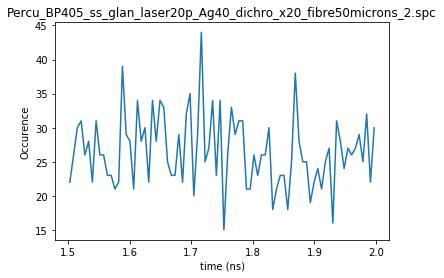

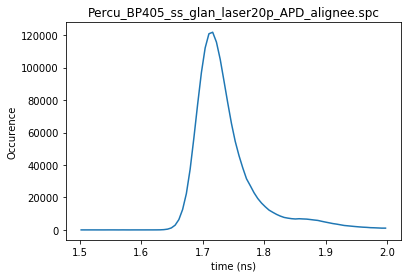

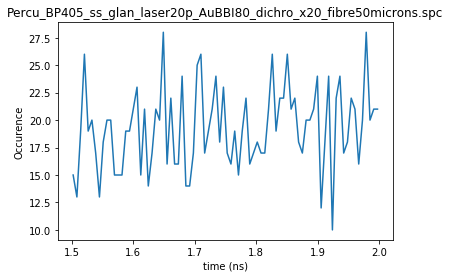

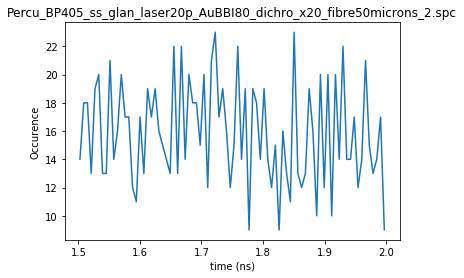

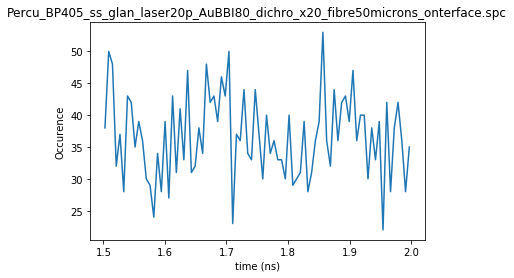

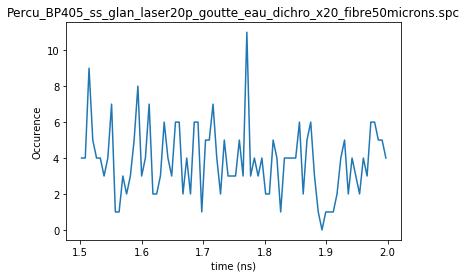

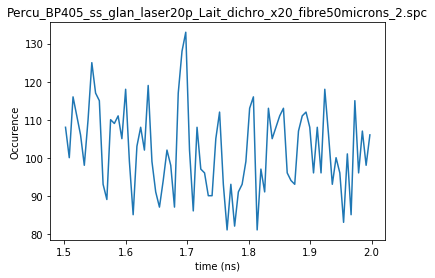

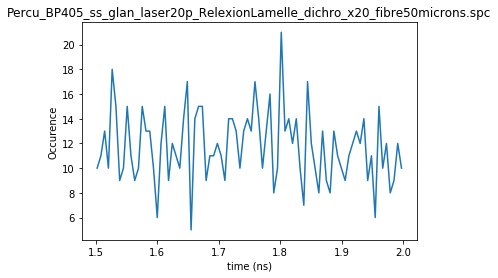

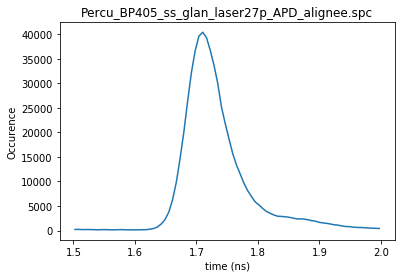

In [6]:
for exp in exp_list:

    exp.micro_time_life_time()
    
    # Alias variables from the results object.
    # There are as many lifetime results as there are channels.
    lifetime_histogram = exp.results.lifetimes[0].data
    lifetime_time_axis = exp.results.lifetimes[0].timeAxis
    
    
    lim_min = np.searchsorted(lifetime_time_axis, 1.5)
    lim_max = np.searchsorted(lifetime_time_axis, 2)
        
    
    # Plot
    plt.plot(lifetime_time_axis[lim_min:lim_max], lifetime_histogram[lim_min:lim_max])
    plt.xlabel("time (ns)")
    plt.ylabel("Occurence")
    plt.title(exp.file_name)
    plt.savefig(exp.file_name + ".png", dpi=300)
    plt.show()

